### Sequential API, Functional API

#### Sequential API
- Sequential API는 간단한 모델을 구현하기에 적합하고 단순하게 층을 쌓는 방식으로 쉽고 사용하기가 간단하다.
- Sequential API는 단일 입력 및 출력만 있으므로 레이어를 공유하거나 여러 입력 또는 출력을 가질 수 있는 모델을 생성할 수 없다.

#### Functional API
- Functional API는 Sequential API로는 구현하기 어려운 복잡한 모델들을 구현할 수 있다.
- 여러 개의 입력(multi-input) 및 출력(multi-output)을 가진 모델을 구현하거나,  
층 간의 연결이나 연산을 하는 모델을 구현할 때에는 Functional API를 사용해야 한다.

<img src="./images/functional_api.png" width="400" style="margin-left: 0">


##### Sequential API

In [2]:
# pip install tensorflow
# conda install -c conda-forge wrapt

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_targets), (test_images, test_targets) = fashion_mnist.load_data()

print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [4]:
import numpy as np

(train_images, train_targets), (test_images, test_targets) = fashion_mnist.load_data()

def get_preprocessed_data(images, targets):
    images = np.array(images / 255.0, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)
    
    return images, targets

train_images, train_targets = get_preprocessed_data(train_images, train_targets)
test_images, test_targets = get_preprocessed_data(test_images, test_targets)

print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
INPUT_SIZE = 28

from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

# 전부 Dense layer라고 부른다.
# 학습할 데이터 많으면 neuron의 개수를 더 많이 지정(예, 64, 128 등)하고 은닉층(hidden layer)수를 더 늘려도 되고,
# 학습할 데이터가 적으면 neuron 수와 은닉층 수를 줄이는 것이 좋다.
model = Sequential([
#     전체 28 * 28(784)개의 feature로 flatten 진행
#     첫 번째 Input layer
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
#     두 번째 hidden layer
    Dense(64, activation='relu'),
#      세 번째 hidden layer
    Dense(128, activation='relu'),
#     네 번째 output layer
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 59850 (233.79 KB)
Trainable params: 59850 (233.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model.compile(optimizer=Adam(0.001), loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [7]:
from tensorflow.keras.utils import to_categorical

train_oh_targets = to_categorical(train_targets)
test_oh_targets = to_categorical(test_targets)

print(train_oh_targets.shape, test_oh_targets.shape)

(60000, 10) (10000, 10)


In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
history = model.fit(x=train_images, y=train_oh_targets, batch_size=32, epochs=20, verbose=1)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5015 - accuracy: 0.8199
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3737 - accuracy: 0.8631
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3374 - accuracy: 0.8755
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3154 - accuracy: 0.8836
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2982 - accuracy: 0.8888
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2850 - accuracy: 0.8933
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2722 - accuracy: 0.8984
Epoch 8/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2604 - accuracy: 0.9026
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2527 - accuracy: 0.9044
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.243

In [10]:
print(history.history['loss'])
print("=" * 80)
print(history.history['accuracy'])

[0.5014814138412476, 0.3737047612667084, 0.33739209175109863, 0.3153892457485199, 0.2981688380241394, 0.2850078046321869, 0.2721598446369171, 0.2604326605796814, 0.25269845128059387, 0.24384747445583344, 0.2365676313638687, 0.2286626249551773, 0.22326278686523438, 0.21706511080265045, 0.2104341983795166, 0.20546667277812958, 0.20061185956001282, 0.19538213312625885, 0.19063937664031982, 0.1861022263765335]
[0.8198666572570801, 0.8630666732788086, 0.8755333423614502, 0.883566677570343, 0.8888499736785889, 0.8932999968528748, 0.8983666896820068, 0.90256667137146, 0.9043999910354614, 0.9076499938964844, 0.9104666709899902, 0.9131166934967041, 0.9137499928474426, 0.9178833365440369, 0.9200999736785889, 0.9211500287055969, 0.922950029373169, 0.9242833256721497, 0.926966667175293, 0.9289500117301941]


In [11]:
pred_proba = model.predict(np.expand_dims(test_images[0], axis=0))
print('softmax output:', pred_proba)
pred = np.argmax(np.squeeze(pred_proba))
print('predicted target value:', pred)

1/1 [==============================] - 0s 62ms/step
softmax output: [[2.6628660e-10 4.6659605e-09 3.2449057e-10 3.0120212e-11 2.5639054e-08
  1.8534005e-06 2.3537368e-08 1.3192635e-03 3.3710290e-10 9.9867886e-01]]
predicted target value: 9


Text(0.5, 1.0, '9. Ankle boot')

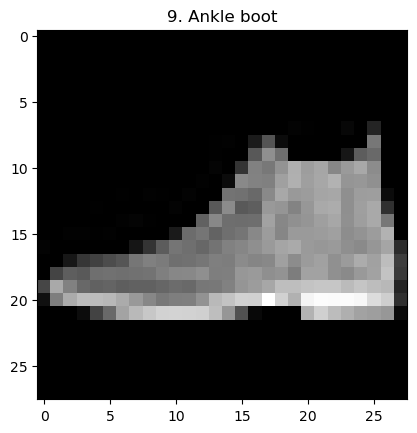

In [12]:
import matplotlib.pyplot as plt

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.imshow(test_images[0], cmap='gray')
plt.title(str(int(test_targets[0])) + '. ' + class_names[int(test_targets[0])])

In [13]:
model.evaluate(test_images, test_oh_targets, batch_size=32)

313/313 [==============================] - 0s 1ms/step - loss: 0.3633 - accuracy: 0.8872


[0.3632783591747284, 0.8871999979019165]

##### Validation Data
- 훈련 데이터를 잘 맞추는 모델이 아니라, 학습에 사용하지 않은 테스트 데이터를 얼마나 잘 맞추는지가 목적이다.
- 훈련 데이터로 모델을 만들고 검증 데이터로 성능을 평가한다.
- 성능이 만족스럽다면, 해당 모델에 훈련 데이터와 검증 데이터를 합쳐서 학습 시킨 후 테스트 데이터를 넣어 확인한다.

<img src="./images/validation.jpg" width="500" style="margin-left: 0">

In [14]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_targets), (test_images, test_targets) = fashion_mnist.load_data()

def get_preprocessed_data(images, targets):
    images = np.array(images / 255.0, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)
    
    return images, targets

train_images, train_targets = get_preprocessed_data(train_images, train_targets)
test_images, test_targets = get_preprocessed_data(test_images, test_targets)

In [15]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

train_train_images, validation_images, train_train_targets, validation_targets = train_test_split(train_images, train_targets, test_size=0.2, stratify=train_targets, random_state=124)
print(train_train_images.shape, train_train_targets.shape, validation_images.shape, validation_targets.shape)

train_train_oh_targets = to_categorical(train_train_targets)
validation_oh_targets = to_categorical(validation_targets)

print(train_train_oh_targets.shape, validation_oh_targets.shape)

(48000, 28, 28) (48000,) (12000, 28, 28) (12000,)
(48000, 10) (12000, 10)


In [16]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

INPUT_SIZE = 28

model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(0.001), loss=CategoricalCrossentropy(), metrics=['acc'])

In [17]:
history = model.fit(x=train_train_images, y=train_train_oh_targets, batch_size=32, validation_data=(validation_images, validation_oh_targets), epochs=20, verbose=2)

Epoch 1/20
1500/1500 - 3s - loss: 0.5219 - acc: 0.8141 - val_loss: 0.4887 - val_acc: 0.8096 - 3s/epoch - 2ms/step
Epoch 2/20
1500/1500 - 2s - loss: 0.3824 - acc: 0.8598 - val_loss: 0.3708 - val_acc: 0.8644 - 2s/epoch - 2ms/step
Epoch 3/20
1500/1500 - 3s - loss: 0.3452 - acc: 0.8743 - val_loss: 0.3941 - val_acc: 0.8497 - 3s/epoch - 2ms/step
Epoch 4/20
1500/1500 - 3s - loss: 0.3233 - acc: 0.8800 - val_loss: 0.3351 - val_acc: 0.8788 - 3s/epoch - 2ms/step
Epoch 5/20
1500/1500 - 3s - loss: 0.3064 - acc: 0.8880 - val_loss: 0.3223 - val_acc: 0.8817 - 3s/epoch - 2ms/step
Epoch 6/20
1500/1500 - 2s - loss: 0.2903 - acc: 0.8914 - val_loss: 0.3269 - val_acc: 0.8832 - 2s/epoch - 2ms/step
Epoch 7/20
1500/1500 - 2s - loss: 0.2793 - acc: 0.8963 - val_loss: 0.3191 - val_acc: 0.8849 - 2s/epoch - 2ms/step
Epoch 8/20
1500/1500 - 3s - loss: 0.2689 - acc: 0.8998 - val_loss: 0.3015 - val_acc: 0.8928 - 3s/epoch - 2ms/step
Epoch 9/20
1500/1500 - 3s - loss: 0.2585 - acc: 0.9042 - val_loss: 0.3258 - val_acc: 0.8

In [18]:
print(history.history['loss'])
print("=" * 80)
print(history.history['acc'])
print("=" * 80)
print(history.history['val_loss'])
print("=" * 80)
print(history.history['val_acc'])

[0.5218536853790283, 0.382353276014328, 0.3452085852622986, 0.32328569889068604, 0.3063993453979492, 0.29029637575149536, 0.2792817950248718, 0.26888546347618103, 0.25852274894714355, 0.24817998707294464, 0.2414761334657669, 0.23173774778842926, 0.2268533557653427, 0.22001153230667114, 0.21312540769577026, 0.20425203442573547, 0.20094361901283264, 0.19578896462917328, 0.1920909285545349, 0.1835489720106125]
[0.8141041398048401, 0.8597916960716248, 0.8742916584014893, 0.8799791932106018, 0.8880416750907898, 0.8914166688919067, 0.8962708115577698, 0.8997708559036255, 0.9042083621025085, 0.9071041941642761, 0.9080416560173035, 0.9120000004768372, 0.914229154586792, 0.9162499904632568, 0.9180625081062317, 0.9212291836738586, 0.9238749742507935, 0.9258333444595337, 0.926604151725769, 0.9303125143051147]
[0.4886946678161621, 0.37082457542419434, 0.3940792977809906, 0.3351454436779022, 0.3223349153995514, 0.3268909156322479, 0.3190503418445587, 0.30146485567092896, 0.32579275965690613, 0.3413

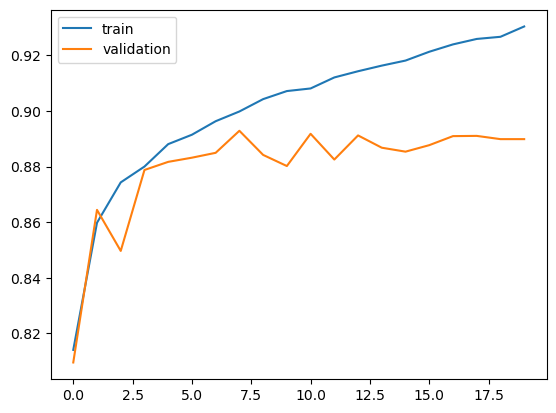

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.legend()

In [20]:
pred_proba = model.predict(np.expand_dims(test_images[8], axis=0))
print('softmax output: ', pred_proba)
pred = np.argmax(np.squeeze(pred_proba))
print('predicted target value: ', pred)

1/1 [==============================] - 0s 42ms/step
softmax output:  [[1.5941685e-08 1.6087103e-16 1.0131812e-09 4.4834703e-10 2.7775501e-13
  1.0000000e+00 4.1857148e-10 4.9574045e-10 3.5443397e-12 4.3510494e-15]]
predicted target value:  5


Text(0.5, 1.0, '5. Sandal')

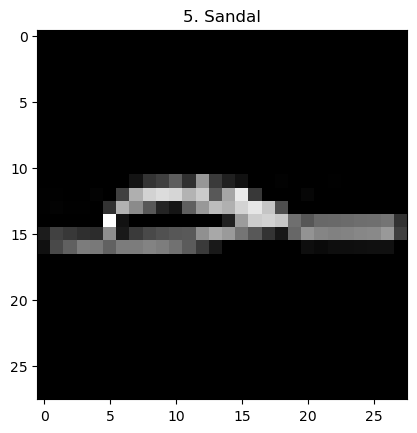

In [21]:
import matplotlib.pyplot as plt

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.imshow(test_images[8], cmap='gray')
plt.title(str(int(test_targets[8])) + '. ' + class_names[int(test_targets[8])])

In [22]:
model.evaluate(test_images, test_oh_targets, batch_size=32)

313/313 [==============================] - 1s 1ms/step - loss: 0.3775 - acc: 0.8847


[0.3775312602519989, 0.8847000002861023]

##### Functional API

In [23]:
class Test:
    def __call__(self, data):
        return data + 10

print(Test()(20))

30


In [24]:
from tensorflow.keras.layers import Layer, Input, Dense, Flatten
from tensorflow.keras.models import Model
import tensorflow as tf

INPUT_SIZE = 28

def create_model():
    input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE))
    x = Flatten()(input_tensor)
    x = Dense(64, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    output = Dense(10, activation='softmax')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    return model

In [25]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_targets), (test_images, test_targets) = fashion_mnist.load_data()

def get_preprocessed_data(images, targets):
    images = np.array(images / 255.0, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)
    
    return images, targets

def get_preprocessed_ohe(images, targets):
    images, targets = get_preprocessed_data(images, targets)
    oh_targets = to_categorical(targets)
    return images, oh_targets

def get_train_valid_test(train_images, train_targets, test_images, test_targets, validation_size=0.2, random_state=124):
    train_images, train_oh_targets = get_preprocessed_ohe(train_images, train_targets)
    test_images, test_oh_targets = get_preprocessed_ohe(test_images, test_targets)
    
    train_train_images, validation_images, train_train_oh_targets, validation_oh_targets = \
    train_test_split(train_images, train_oh_targets, stratify=train_oh_targets, test_size=validation_size, random_state=random_state)
    
    return (train_train_images, train_train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets)

In [26]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_targets), (test_images, test_targets) = fashion_mnist.load_data()

(train_train_images, train_train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets) = \
get_train_valid_test(train_images, train_targets, test_images, test_targets)

print(train_train_images.shape, train_train_oh_targets.shape)
print(validation_images.shape, validation_oh_targets.shape)
print(test_images.shape, test_oh_targets.shape)

(48000, 28, 28) (48000, 10)
(12000, 28, 28) (12000, 10)
(10000, 28, 28) (10000, 10)


In [27]:
from tensorflow.keras.optimizers import Adam

model = create_model()
model.summary()

model.compile(optimizer=Adam(0.001), loss=CategoricalCrossentropy(), metrics=['acc'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 59850 (233.79 KB)
Trainable params: 59850 (233.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
history = model.fit(
    x=train_train_images, 
    y=train_train_oh_targets, 
    batch_size=64, 
    epochs=20, 
    validation_data=(validation_images, validation_oh_targets))

Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 0.5481 - acc: 0.8066 - val_loss: 0.4125 - val_acc: 0.8504
Epoch 2/20
750/750 [==============================] - 1s 2ms/step - loss: 0.3938 - acc: 0.8563 - val_loss: 0.3990 - val_acc: 0.8498
Epoch 3/20
750/750 [==============================] - 1s 2ms/step - loss: 0.3532 - acc: 0.8716 - val_loss: 0.3570 - val_acc: 0.8658
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3305 - acc: 0.8784 - val_loss: 0.3454 - val_acc: 0.8734
Epoch 5/20
750/750 [==============================] - 1s 2ms/step - loss: 0.3080 - acc: 0.8881 - val_loss: 0.3390 - val_acc: 0.8758
Epoch 6/20
750/750 [==============================] - 1s 2ms/step - loss: 0.2961 - acc: 0.8903 - val_loss: 0.3354 - val_acc: 0.8750
Epoch 7/20
750/750 [==============================] - 1s 2ms/step - loss: 0.2812 - acc: 0.8953 - val_loss: 0.3109 - val_acc: 0.8855
Epoch 8/20
750/750 [==============================] - 1s 2ms/step - loss: 0.

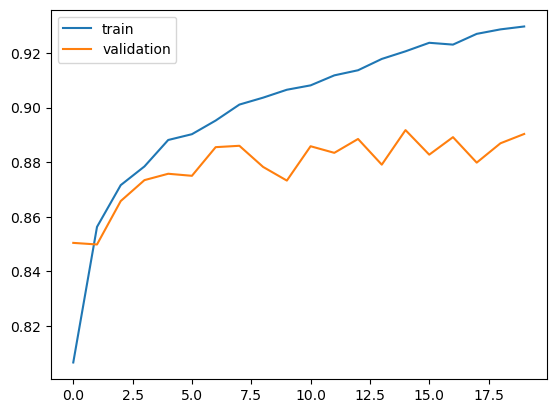

In [29]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()

show_history(history)

In [30]:
pred_proba = model.predict(np.expand_dims(test_images[124], axis=0))
print('softmax output: ', pred_proba)
pred = np.argmax(np.squeeze(pred_proba))
print('predicted target value: ', pred)

1/1 [==============================] - 0s 51ms/step
softmax output:  [[4.4669206e-03 1.4793113e-05 1.2641985e-04 9.9152792e-01 3.0515236e-03
  1.3572917e-07 8.0129341e-04 2.4714899e-09 1.0916790e-05 2.2616522e-08]]
predicted target value:  3


Text(0.5, 1.0, '3. Dress')

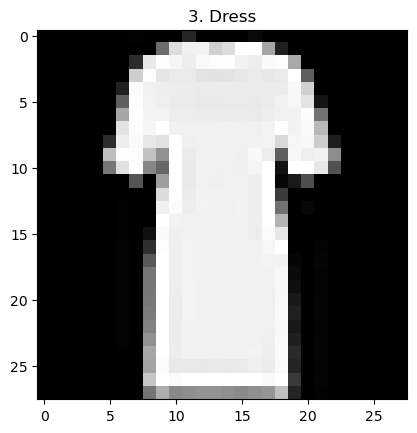

In [31]:
import matplotlib.pyplot as plt

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.imshow(test_images[124], cmap='gray')
plt.title(str(int(test_targets[124])) + '. ' + class_names[int(test_targets[124])])

In [32]:
model.evaluate(test_images, test_oh_targets, batch_size=64)

157/157 [==============================] - 0s 1ms/step - loss: 0.3762 - acc: 0.8839


[0.376186728477478, 0.883899986743927]